<a href="https://colab.research.google.com/github/feomedeirosdev/ml-courseira/blob/main/005_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CursoIA/3.Algoritmos de Machine Learning/insurance.csv', keep_default_na=False)
df

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GoodStudent   20000 non-null  bool  
 1   Age           20000 non-null  object
 2   SocioEcon     20000 non-null  object
 3   RiskAversion  20000 non-null  object
 4   VehicleYear   20000 non-null  object
 5   ThisCarDam    20000 non-null  object
 6   RuggedAuto    20000 non-null  object
 7   Accident      20000 non-null  object
 8   MakeModel     20000 non-null  object
 9   DrivQuality   20000 non-null  object
 10  Mileage       20000 non-null  object
 11  Antilock      20000 non-null  bool  
 12  DrivingSkill  20000 non-null  object
 13  SeniorTrain   20000 non-null  bool  
 14  ThisCarCost   20000 non-null  object
 15  Theft         20000 non-null  bool  
 16  CarValue      20000 non-null  object
 17  HomeBase      20000 non-null  object
 18  AntiTheft     20000 non-null  bool  
 19  Prop

In [ ]:
target = 'Accident'
features = list(df.drop(columns=[target]).columns)

X = df[features]
y = df[target]

In [ ]:
X

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,MakeModel,DrivQuality,Mileage,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Economy,Poor,TwentyThou,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,Economy,Normal,TwentyThou,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,FamilySedan,Excellent,Domino,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,Economy,Normal,FiftyThou,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Economy,Poor,FiftyThou,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Economy,Poor,TwentyThou,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,FamilySedan,Normal,FiftyThou,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,Luxury,Excellent,Domino,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,FamilySedan,Excellent,TwentyThou,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [ ]:
y

,Accident
0,Mild
1,None
2,None
3,None
4,Moderate
...,...
19995,Mild
19996,None
19997,None
19998,None


In [ ]:
for col in X.columns:
  if X[col].dtype == 'object':
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X

<ipython-input-85-4272999010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-85-4272999010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-85-4272999010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,MakeModel,DrivQuality,Mileage,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,1,1,0,1,1,0,0,2,3,...,0,False,2,2,True,3,3,False,3,0
1,False,2,1,1,0,2,1,0,1,3,...,0,True,3,2,True,3,2,True,3,2
2,False,2,2,3,0,2,1,1,0,0,...,0,False,3,2,False,3,2,True,3,1
3,False,0,0,2,1,2,0,0,1,1,...,3,False,3,2,True,3,1,False,3,2
4,False,0,1,2,1,1,1,0,2,1,...,0,False,2,2,False,3,1,False,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,1,1,0,1,0,1,0,2,3,...,0,False,3,2,True,3,1,False,3,0
19996,False,1,0,2,1,2,2,1,1,1,...,3,False,3,2,True,3,2,False,3,2
19997,False,2,2,2,0,2,1,2,0,0,...,2,True,2,2,False,3,0,True,3,2
19998,False,1,0,2,1,2,1,1,0,3,...,3,False,3,2,True,3,2,True,3,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42)

In [ ]:
dtc = DecisionTreeClassifier(
    max_depth=8,
    max_leaf_nodes=6,
    random_state=42,)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=6, random_state=42)

In [ ]:
dtc_predict = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_predict)
dtc_precision = precision_score(y_test, dtc_predict, average='weighted')
dtc_recall = recall_score(y_test, dtc_predict, average='weighted')
dtc_f1 = f1_score(y_test, dtc_predict, average='weighted')
dtc_cm = confusion_matrix(y_test, dtc_predict)

print(dtc_cm)
print()
print(f'Acurácia: {dtc_accuracy*100:.2f}%')
print(f'Precisão: {dtc_precision*100:.2f}%')
print(f'Recall: {dtc_recall*100:.2f}%')
print(f'F1: {dtc_f1*100:.2f}%')
print()
print(classification_report(y_test, dtc_predict))

[[ 236   44   64    4]
 [  45  219    0   57]
 [   0    3 2864    0]
 [   0   36    3  425]]

Acurácia: 93.60%
Precisão: 93.31%
Recall: 93.60%
F1: 93.36%

              precision    recall  f1-score   support

        Mild       0.84      0.68      0.75       348
    Moderate       0.73      0.68      0.70       321
        None       0.98      1.00      0.99      2867
      Severe       0.87      0.92      0.89       464

    accuracy                           0.94      4000
   macro avg       0.85      0.82      0.83      4000
weighted avg       0.93      0.94      0.93      4000



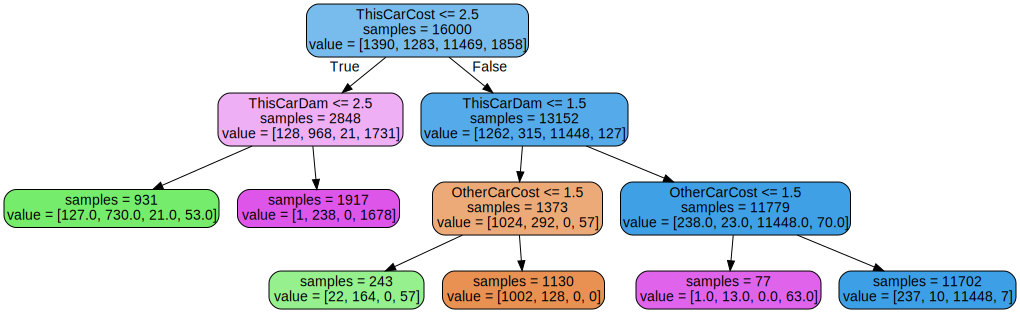

In [ ]:
dtc_data = export_graphviz(
    dtc,
    out_file=None,
    feature_names=features,
    # class_names=['0', '1'],
    filled=True,
    rounded=True,
    impurity=False,)

dtc_graph = graphviz.Source(dtc_data)
dtc_graph.render('dtc_graph', format='png')
dtc_graph